## Домашнее задание «Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [3]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [ ]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 

In [5]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [25]:
from scipy.stats import f_oneway

In [26]:
f_oneway(water, nutri, mineral)

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

Промежуточный вывод: по крайней мере две группу существенно отличаются друг от друга. Далее необходимо провести попарное сравнение с поправкой на эффект 

#### 4. Cookie cats

In [7]:
data = pd.read_csv('../data/cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. 

Переменные:

- userid - уникальный номер, идентифицирующий каждого игрока.
- версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
- sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки
- retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?
- retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

In [8]:
# Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Предварительный вывод: несколько больше людей вернулись через 7 дней после установки, когда ворота были установлены на уровне 40.

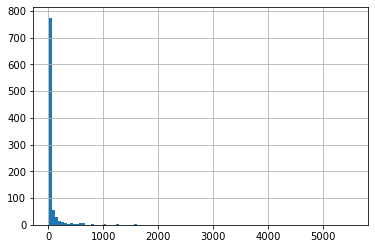

In [17]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins = 100)  # попробуйте bins=150

Наибольшее количество игроков сыграли небольшое количество раундов.

Text(0.5, 0, '# Game rounds')

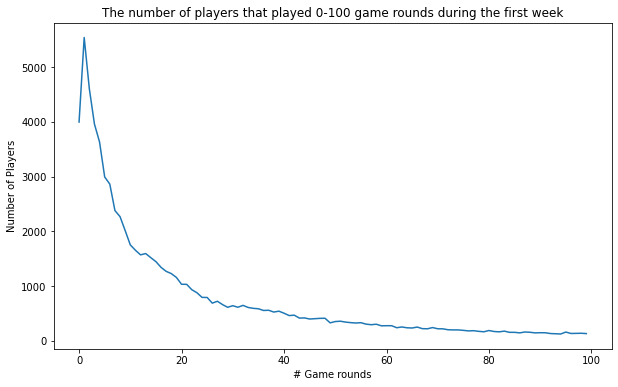

In [16]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

Также видим, что наибольшее количество игроков сыграли 2-3 раунда в первую неделю.

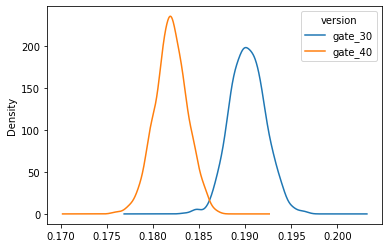

In [20]:
# Creating a list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Разделяем выборки на две части: gate_30 и gate_40

In [28]:
data_30 = data[['version'] == gate_30]
data_30.head(3)

NameError: name 'gate_30' is not defined

**Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.**

In [21]:
from scipy.stats import f_oneway
